In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as s

In [ ]:
def clean_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[["L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)', 'Age at CT']]
    n = ct_data.shape[0]
    preprocessed_ct_data = []
    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break
        if not ignore:
          preprocessed_ct_data.append(row)
    return np.array(preprocessed_ct_data, dtype=np.float32)


In [ ]:
oppScrData = pd.read_excel (r'sample_data/OppScrData.xlsx')  
ct_data = clean_ct_data(oppScrData)

In [ ]:
y = ct_data[:,-1]
X = (ct_data[:,:-1])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X

array([[ 192.      ,  485.50287 ,  694.3143  , ...,   48.41319 ,
        2709.064   ,   52.      ],
       [ 256.      ,  490.05453 ,  706.0515  , ...,   50.101334,
           0.      ,   54.      ],
       [ 149.      ,  289.1081  ,  584.4892  , ...,   69.11585 ,
        2586.575   ,   57.      ],
       ...,
       [ 135.      ,  822.2872  , 1154.6051  , ...,   57.78635 ,
        1115.997   ,   45.      ],
       [ 219.      ,  418.2     ,  660.3461  , ...,   50.929787,
        3515.371   ,   44.      ],
       [ 151.      ,   61.54359 ,  362.88974 , ...,   29.688124,
        3015.129   ,   54.      ]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = tree.DecisionTreeRegressor(criterion="absolute_error")
clf = clf.fit(X_train, y_train)

In [ ]:
predicted_y = clf.predict(X_test)
sum(abs(y_test - predicted_y))

5433.0

In [ ]:
friedman_mse_clf = tree.DecisionTreeRegressor(criterion="friedman_mse")
friedman_mse_clf = friedman_mse_clf.fit(X_train, y_train)
predicted_y = friedman_mse_clf.predict(X_test)
sum(abs(y_test - predicted_y))

5207.0

**Check for normality in residuals**

https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

(array([  3.,  19.,  44., 148., 299., 259.,  75.,  28.,  10.,   3.]),
 array([-29. , -22.8, -16.6, -10.4,  -4.2,   2. ,   8.2,  14.4,  20.6,
         26.8,  33. ]),
 <a list of 10 Patch objects>)

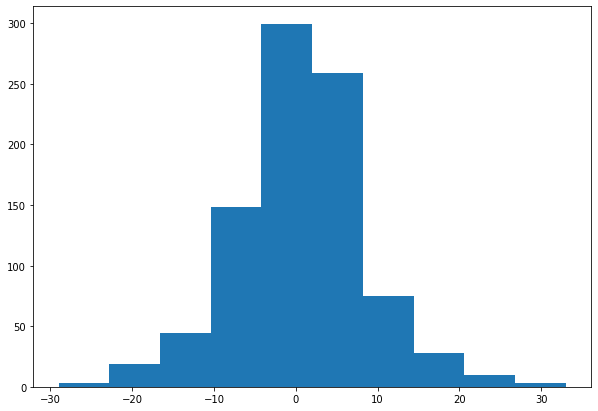

In [ ]:
len(predicted_y)
fig = plt.figure(figsize =(10, 7))
plt.hist(y_test - predicted_y)

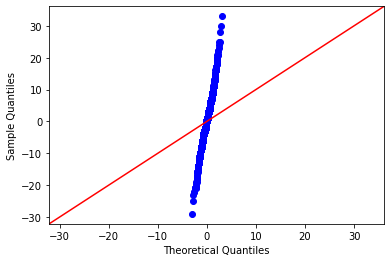

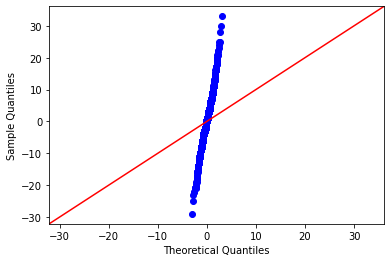

In [15]:
sm.qqplot(y_test - predicted_y, line='45')

In [20]:
from scipy import stats
shapiro_test = stats.shapiro(y_test - predicted_y)
shapiro_test
# for alpha value of 0.05, shapiro test rejects the hypothesis that the data came from a normal distribution
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

(0.988498330116272, 1.949266106748837e-06)

**Models**

In [ ]:
clf = tree.DecisionTreeRegressor(criterion="absolute_error")
clf = clf.fit(X_train, y_train)
predicted_y = clf.predict(X_test)
sum(abs(y_test - predicted_y))

5226.0

In [ ]:
errors = []
depth = [i for i in range(3, 100)]
for i in depth:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
  clf = tree.DecisionTreeRegressor(max_depth=i)
  clf = clf.fit(X_train, y_train)
  predicted_y = clf.predict(X_test)
  errors.append(sum(abs(y_test - predicted_y)**2))


No handles with labels found to put in legend.


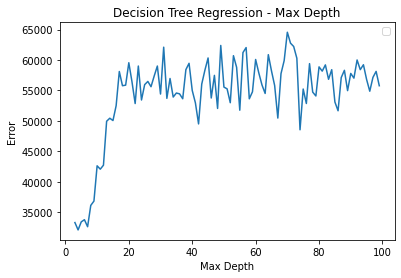

In [ ]:

plt.figure()
plt.plot(depth, errors)
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.title("Decision Tree Regression - Max Depth")
plt.legend()
plt.show()


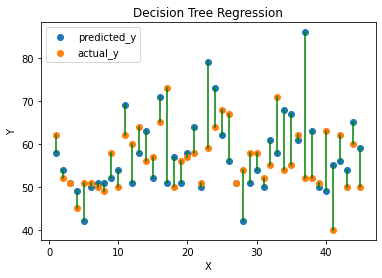

In [ ]:
plt.figure()
x = [i+1 for i in range(len(y_test))]
plt.plot((x,x),([i for i in predicted_y], [j for j in y_test]),c='green')
plt.scatter(x, predicted_y, label="predicted_y")
plt.scatter(x, y_test, label="actual_y")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
regressor = tree.DecisionTreeRegressor()
cross_val_score(regressor, X, y, cv=10)

array([-0.00141493, -0.1856235 , -0.23901702, -0.40512294, -0.05780021,
       -0.07633893, -0.2079092 , -0.09245704,  0.04382965,  0.09265226])

In [ ]:
errors = []
depth = [i for i in range(1, 10)]
for i in depth:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
  clf = tree.DecisionTreeRegressor(min_samples_split=int(i/100*len(X_train)))
  clf = clf.fit(X_train, y_train)
  predicted_y = clf.predict(X_test)
  errors.append(sum(abs(y_test - predicted_y)**2))


No handles with labels found to put in legend.


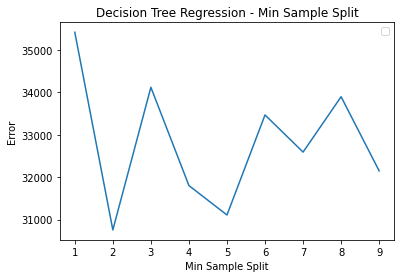

In [ ]:
plt.figure()
plt.plot(depth, errors)
plt.xlabel("Min Sample Split")
plt.ylabel("Error")
plt.title("Decision Tree Regression - Min Sample Split")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rf = RandomForestRegressor(n_estimators=5)
rf = rf.fit(X_train, y_train)
predicted_y = rf.predict(X_test)
sum(abs(y_test - predicted_y))

3995.1999999999994

In [ ]:
errors = []
number_of_trees = [i for i in range(3, 30)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
for i in number_of_trees:
  clf = RandomForestRegressor(n_estimators=i)
  clf = clf.fit(X_train, y_train)
  predicted_y = clf.predict(X_test)
  errors.append(sum(abs(y_test - predicted_y)**2))


No handles with labels found to put in legend.


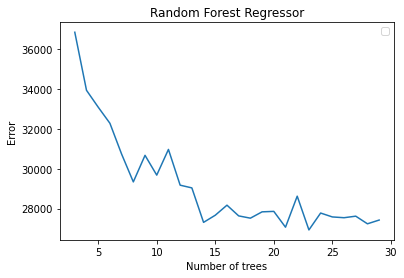

In [ ]:
plt.figure()
plt.plot(number_of_trees, errors)
plt.xlabel("Number of trees")
plt.ylabel("Error")
plt.title("Random Forest Regressor")
plt.legend()
plt.show()
